# Лекция 4

In [123]:
import pandas as pd
import numpy as np
import tqdm
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from math import sqrt

In [8]:
!pip install arch

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

In [9]:
from arch import arch_model

In [140]:
series = pd.read_csv('monthly-boston-armed-robberies-j.csv')['Count']

In [146]:
series2 = np.diff(series,1)

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


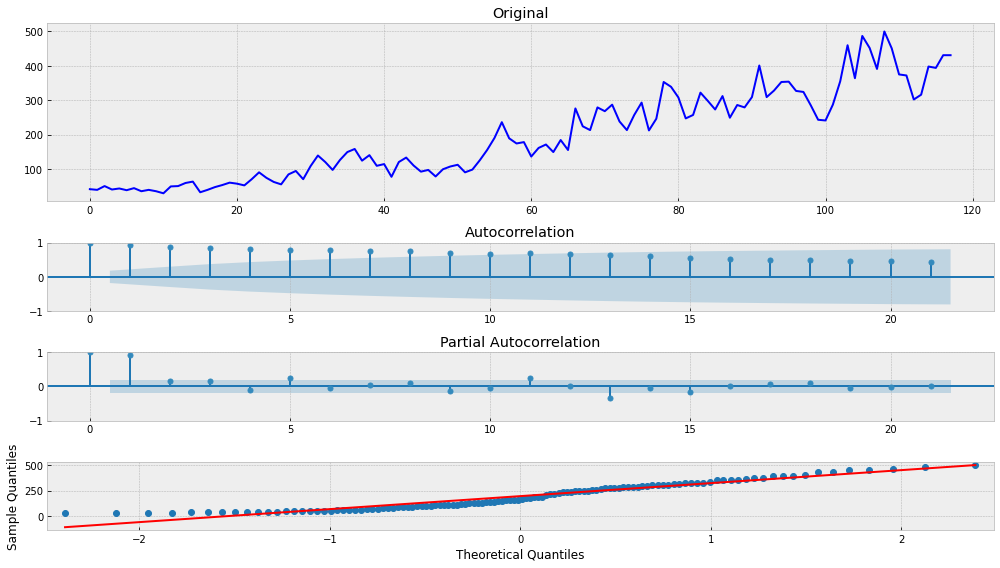

In [141]:
tsplot(series)

In [172]:
am = arch_model(series2,p = 5, q = 5, o = 5, dist = 't')
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     99,   Neg. LLF: 581.4797366371714
Iteration:     10,   Func. Count:    198,   Neg. LLF: 573.7883491895976
Iteration:     15,   Func. Count:    293,   Neg. LLF: 573.6885400832148
Iteration:     20,   Func. Count:    389,   Neg. LLF: 573.5745027624438
Iteration:     25,   Func. Count:    488,   Neg. LLF: 573.7516738133961
Iteration:     30,   Func. Count:    584,   Neg. LLF: 573.1345218251741
Iteration:     35,   Func. Count:    679,   Neg. LLF: 573.0446475310262
Iteration:     40,   Func. Count:    775,   Neg. LLF: 573.0417787993686
Optimization terminated successfully    (Exit mode 0)
            Current function value: 573.041094890937
            Iterations: 40
            Function evaluations: 785
            Gradient evaluations: 40
                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean  

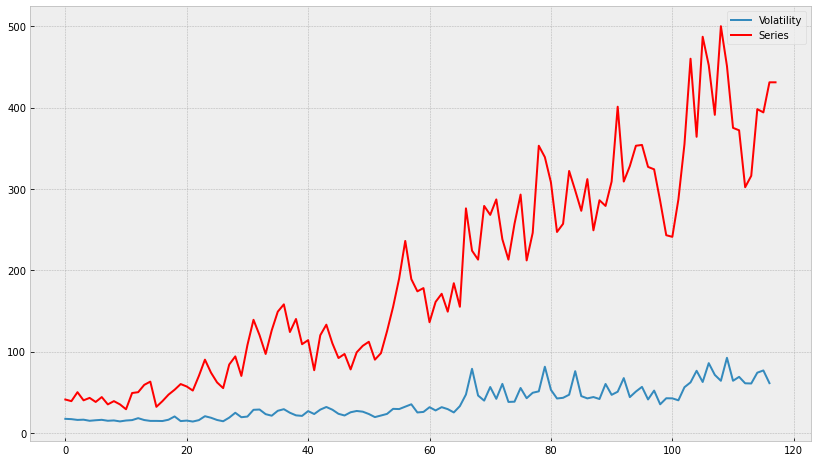

In [173]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(res.conditional_volatility, label='Volatility')
    plt.plot(series, color='red', label='Series')
    plt.legend()

In [ ]:
# получаем график волатильности(изменчивости показателя)